# **Base de datos: Default of Credit Card Clients:**

Esta investigación se centró en el caso de los pagos impagos de los clientes en Taiwán y compara la precisión predictiva de la probabilidad de impago entre seis métodos de minería de datos. Desde la perspectiva de la gestión de riesgos, el resultado de la precisión predictiva de la probabilidad estimada de impago será más valioso que el resultado binario de la clasificación: clientes creíbles o no creíbles. Debido a que se desconoce la probabilidad real de impago, este estudio presentó el novedoso método de suavizado de clasificación para estimar la probabilidad real de impago. Con la probabilidad real de impago como variable de respuesta (Y) y la probabilidad predictiva de impago como variable independiente (X), el resultado de la regresión lineal simple (Y = A + BX) muestra que el modelo de pronóstico producido por la red neuronal artificial tiene el coeficiente de determinación más alto; su intersección de regresión (A) es cercana a cero y el coeficiente de regresión (B) a uno. Por lo tanto, entre las seis técnicas de minería de datos, la red neuronal artificial es la única que puede estimar con precisión la probabilidad real de impago.

La base de datos se descarga directamente de la plataforma: "UCI-Machine Learning Repository", a continuación se comparte el link:

https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

El link de descarga de la base de datos:
https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

Tomamemos en cuenta algunos detalles:

- Variable objetivo (y): BILL_AMT1 → monto de la factura de septiembre.

- Variables predictoras (X): todas las demás columnas excepto:
    - ID (identificador irrelevante),
    - default payment next month (que es la variable objetivo para clasificación, pero aquí no se usa)

# **Librerías**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

from scipy.stats import zscore

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
df = pd.read_excel(url, header=1)
np.set_printoptions(suppress=True)

In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.shape

(30000, 25)

In [ ]:
len(df)

30000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Definir objetivo continuo (ej: monto de la factura de septiembre)
y = df["BILL_AMT1"].astype(float)
X = df.drop(["ID", "default payment next month", "BILL_AMT1"], axis=1)


# **Preprocesamiento de datos**

**Variables Numéricas**

In [ ]:
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numéricas:", numeric_vars)

Variables numéricas: ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [ ]:
numeric_vars

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

Histogramas de todas las variables **numéricas**

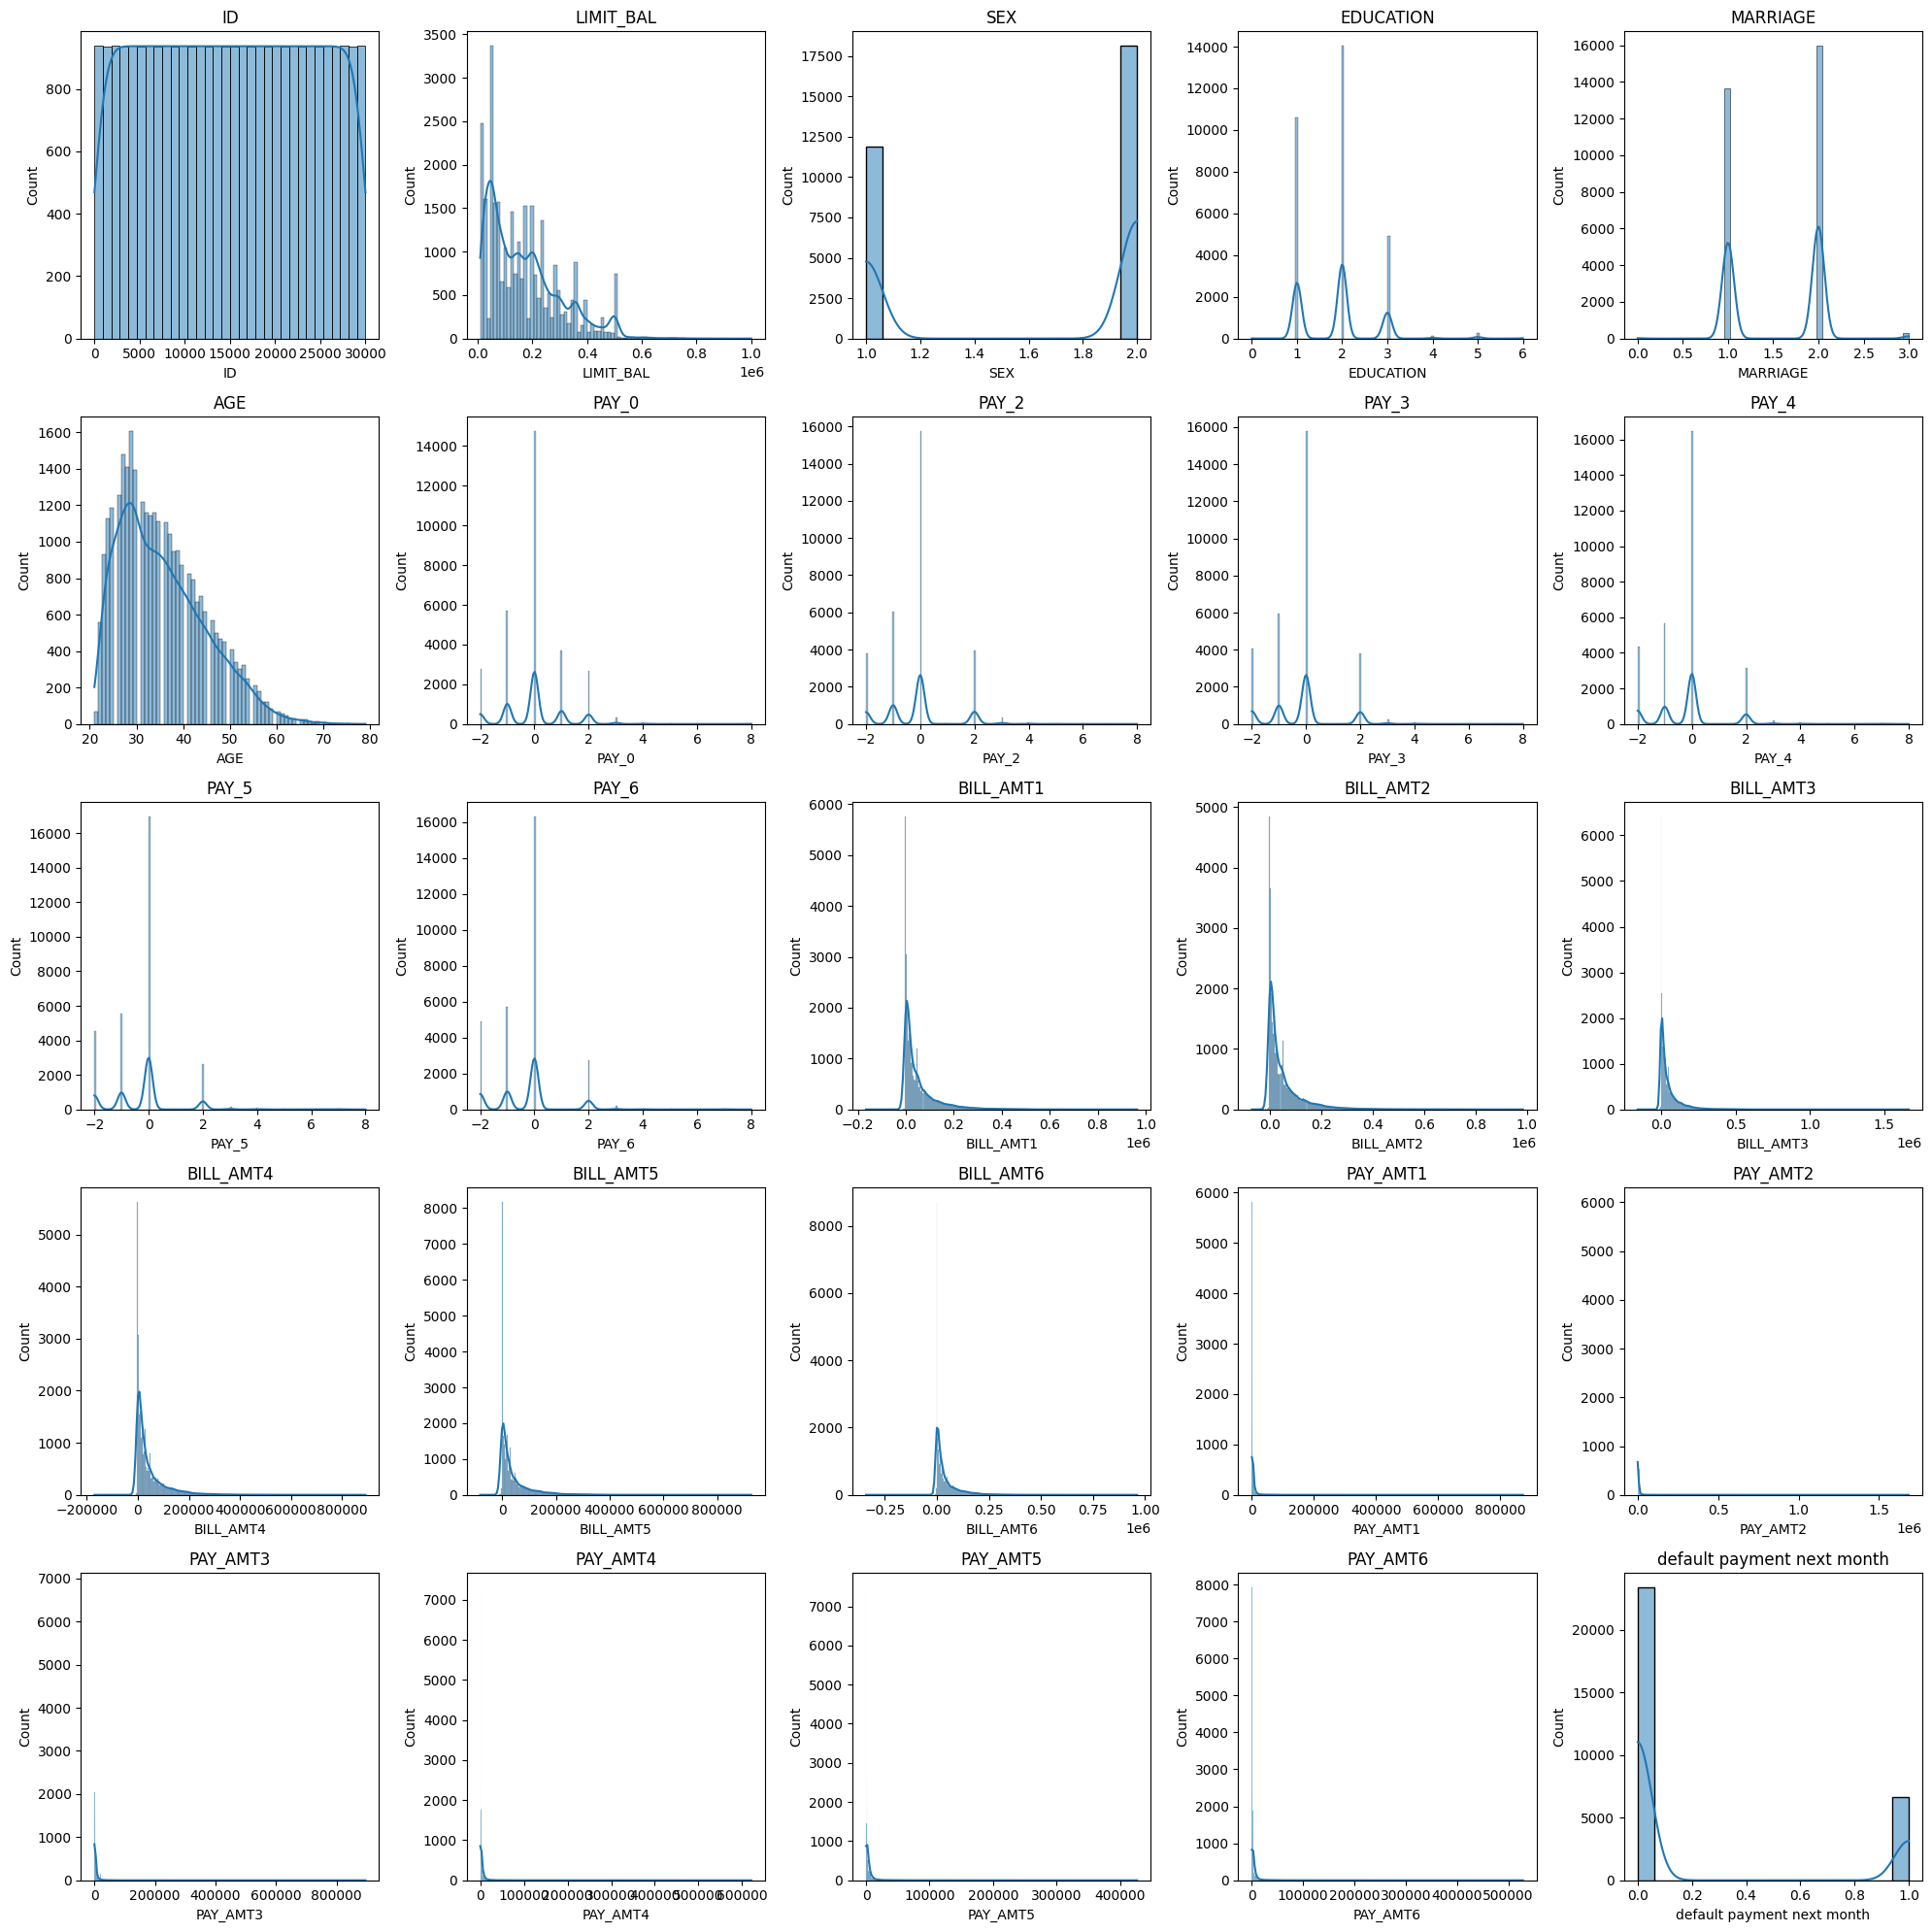

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_vars):
    plt.subplot(5, 5, i + 1)
    sbn.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

**Boxplot para ver outliers**

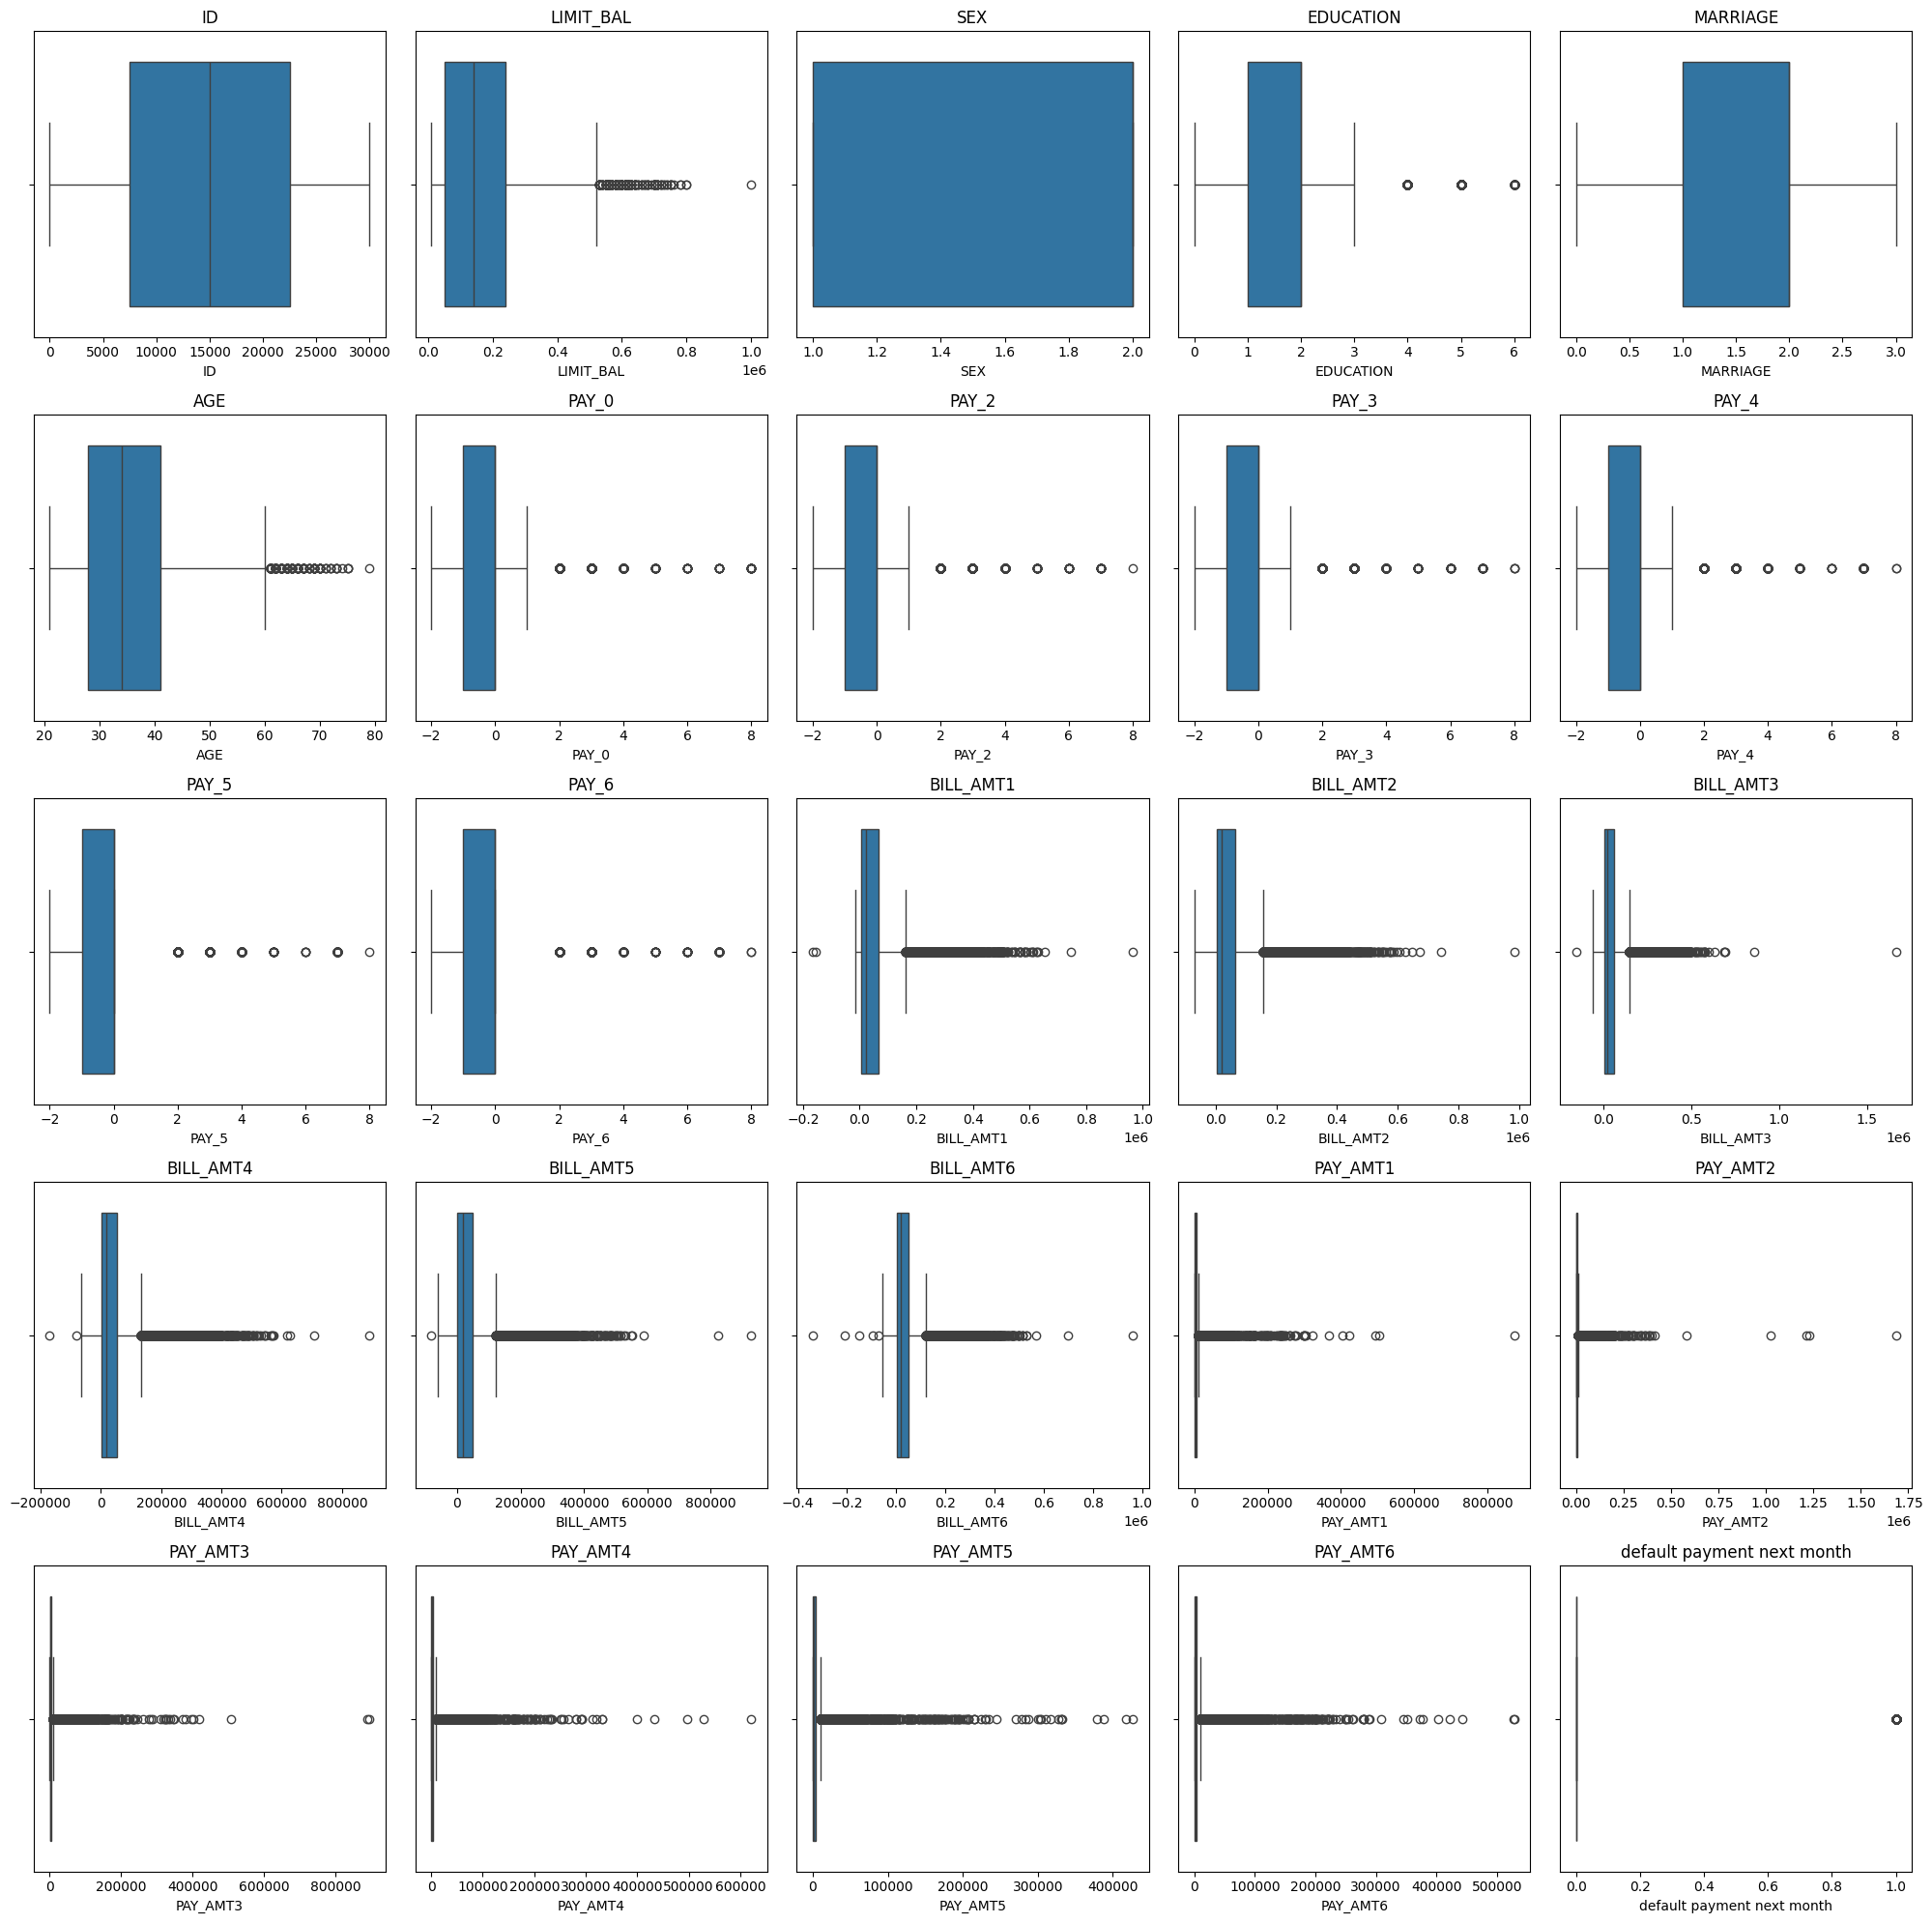

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_vars):
    plt.subplot(5, 5, i + 1)
    sbn.boxplot(x=df[col])             # col: columna
    plt.title(col)
plt.tight_layout()
plt.show()

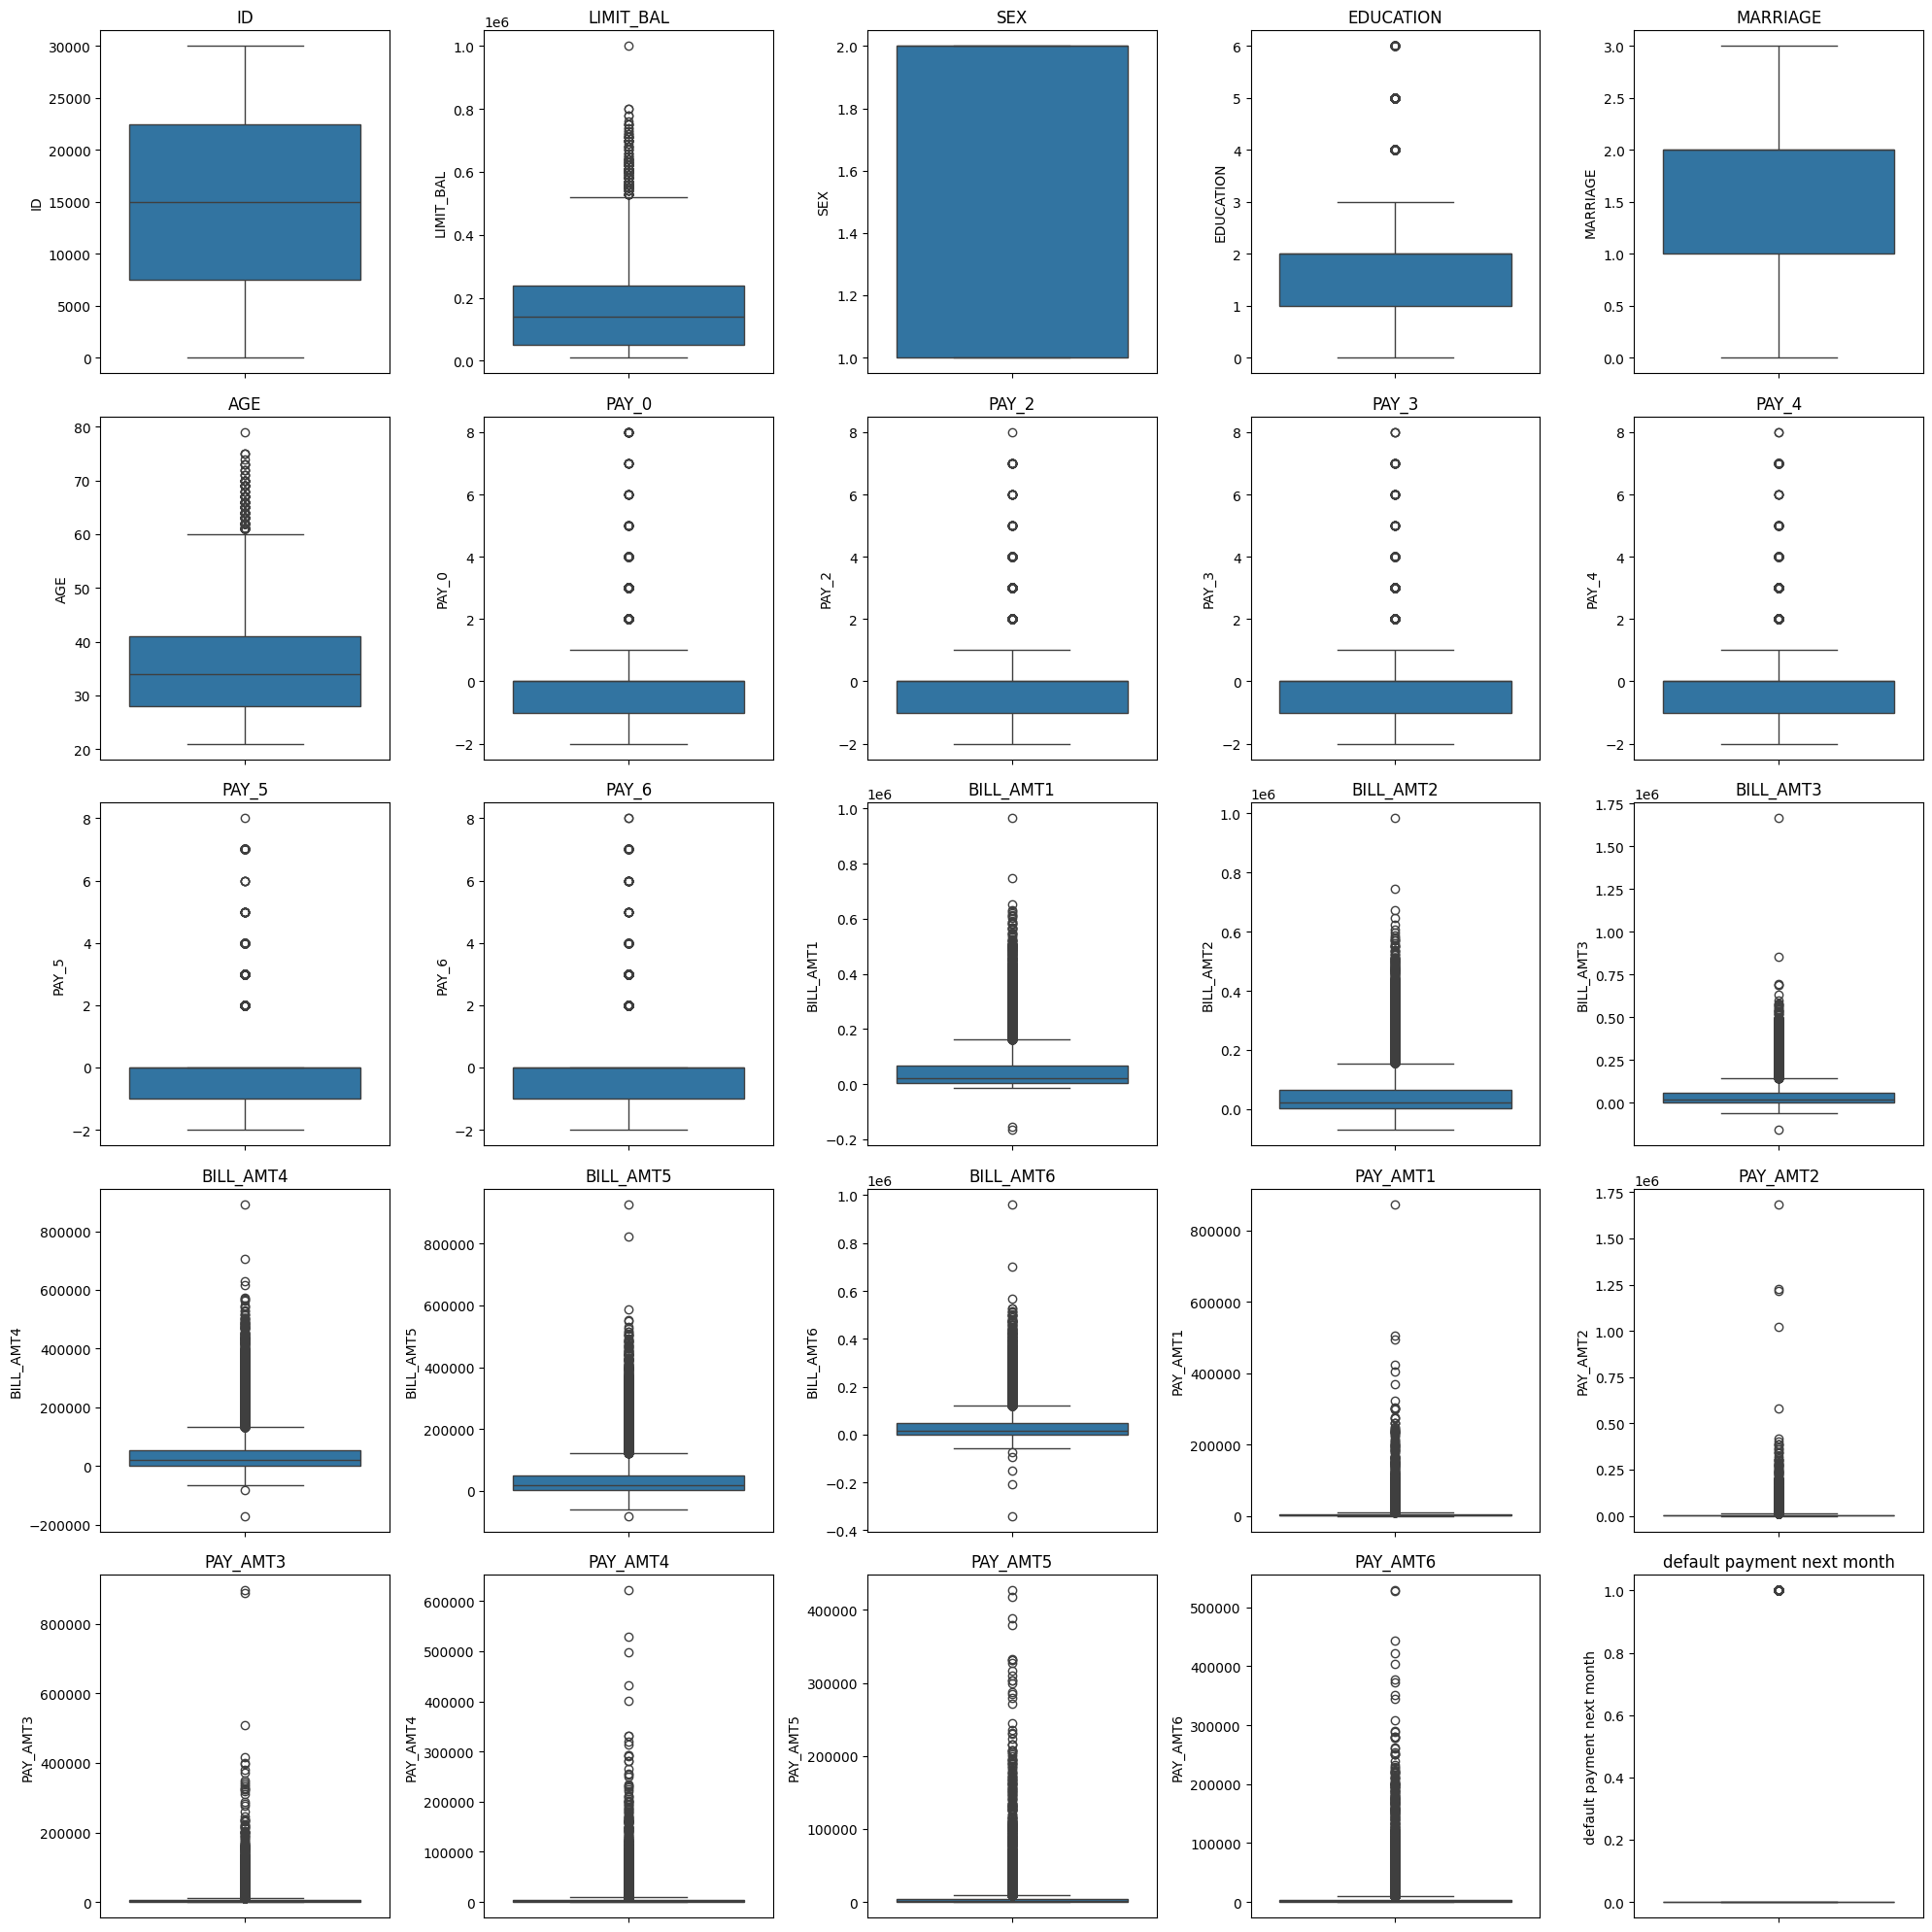

In [ ]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_vars):
    plt.subplot(5, 5, i + 1)
    sbn.boxplot(y=df[col])    # Vertical
    plt.title(col)
plt.tight_layout()
plt.show()

#**RANGO INTERCUARTILICO**

In [ ]:
outliers_info = []

for col in numeric_vars:
    Q1 = df[col].quantile(0.25) #CUARTIL DE 25%
    Q3 = df[col].quantile(0.75) #CUARTIL DE 75%
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]

    count = outliers.shape[0]
    prop = count / df.shape[0]

    outliers_info.append({
        'Variable': col,
        'Outliers': count,
        'Proporción': round(prop, 4)
    })

outliers_df = pd.DataFrame(outliers_info)
print(outliers_df.sort_values("Outliers", ascending=False))

                      Variable  Outliers  Proporción
24  default payment next month      6636      0.2212
7                        PAY_2      4410      0.1470
8                        PAY_3      4209      0.1403
9                        PAY_4      3508      0.1169
6                        PAY_0      3130      0.1043
11                       PAY_6      3079      0.1026
21                    PAY_AMT4      2994      0.0998
10                       PAY_5      2968      0.0989
23                    PAY_AMT6      2958      0.0986
22                    PAY_AMT5      2945      0.0982
18                    PAY_AMT1      2745      0.0915
16                   BILL_AMT5      2725      0.0908
19                    PAY_AMT2      2714      0.0905
17                   BILL_AMT6      2693      0.0898
15                   BILL_AMT4      2622      0.0874
20                    PAY_AMT3      2598      0.0866
14                   BILL_AMT3      2469      0.0823
12                   BILL_AMT1      2400      

**Barplot**

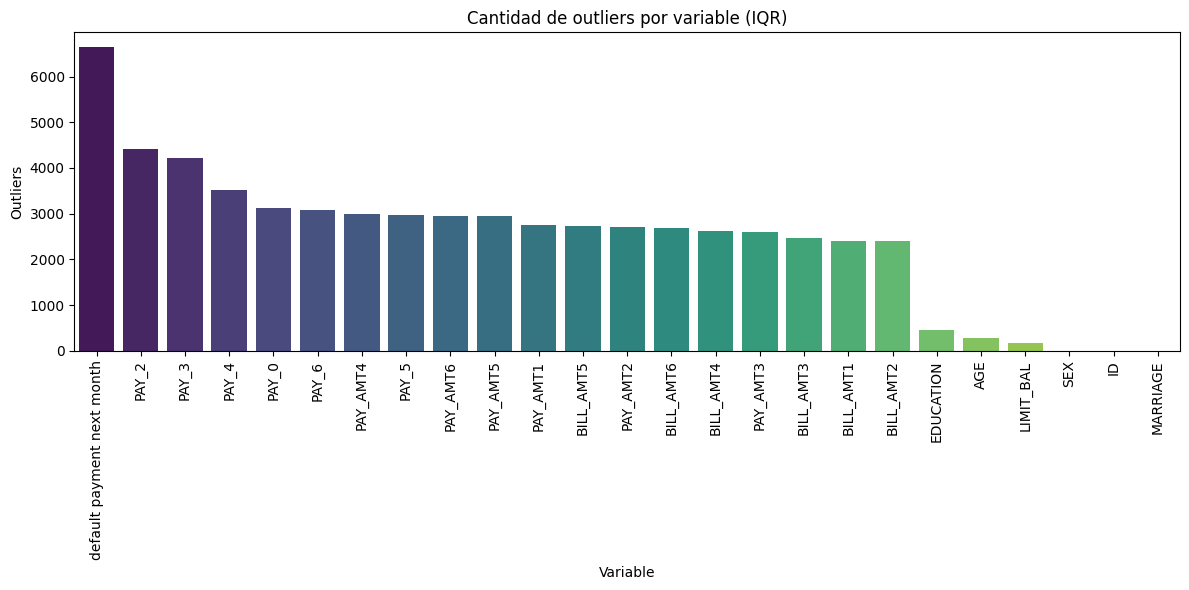

In [ ]:
plt.figure(figsize=(12, 6))
sbn.barplot(data=outliers_df.sort_values("Outliers", ascending=False),
            x="Variable", y="Outliers", hue="Variable", palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.title("Cantidad de outliers por variable (IQR)")
plt.tight_layout()
plt.show()

**Corte de outliers: Z-Scores**

In [ ]:
df_z = df[numeric_vars].apply(zscore)
df_no_outliers_z = df[(np.abs(df_z) < 3).all(axis=1)]
print("Filas sin outliers (Z-Score):", len(df_no_outliers_z))

Filas sin outliers (Z-Score): 26429


**Corte de outliers con: IQR**

In [ ]:
df_no_outliers_iqr = df.copy()
for col in numeric_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers_iqr = df_no_outliers_iqr[(df_no_outliers_iqr[col] >= lower) & (df_no_outliers_iqr[col] <= upper)]

print("Filas sin outliers (IQR):", len(df_no_outliers_iqr))

Filas sin outliers (IQR): 10993


**Boxplots con el DataFrame limpio**

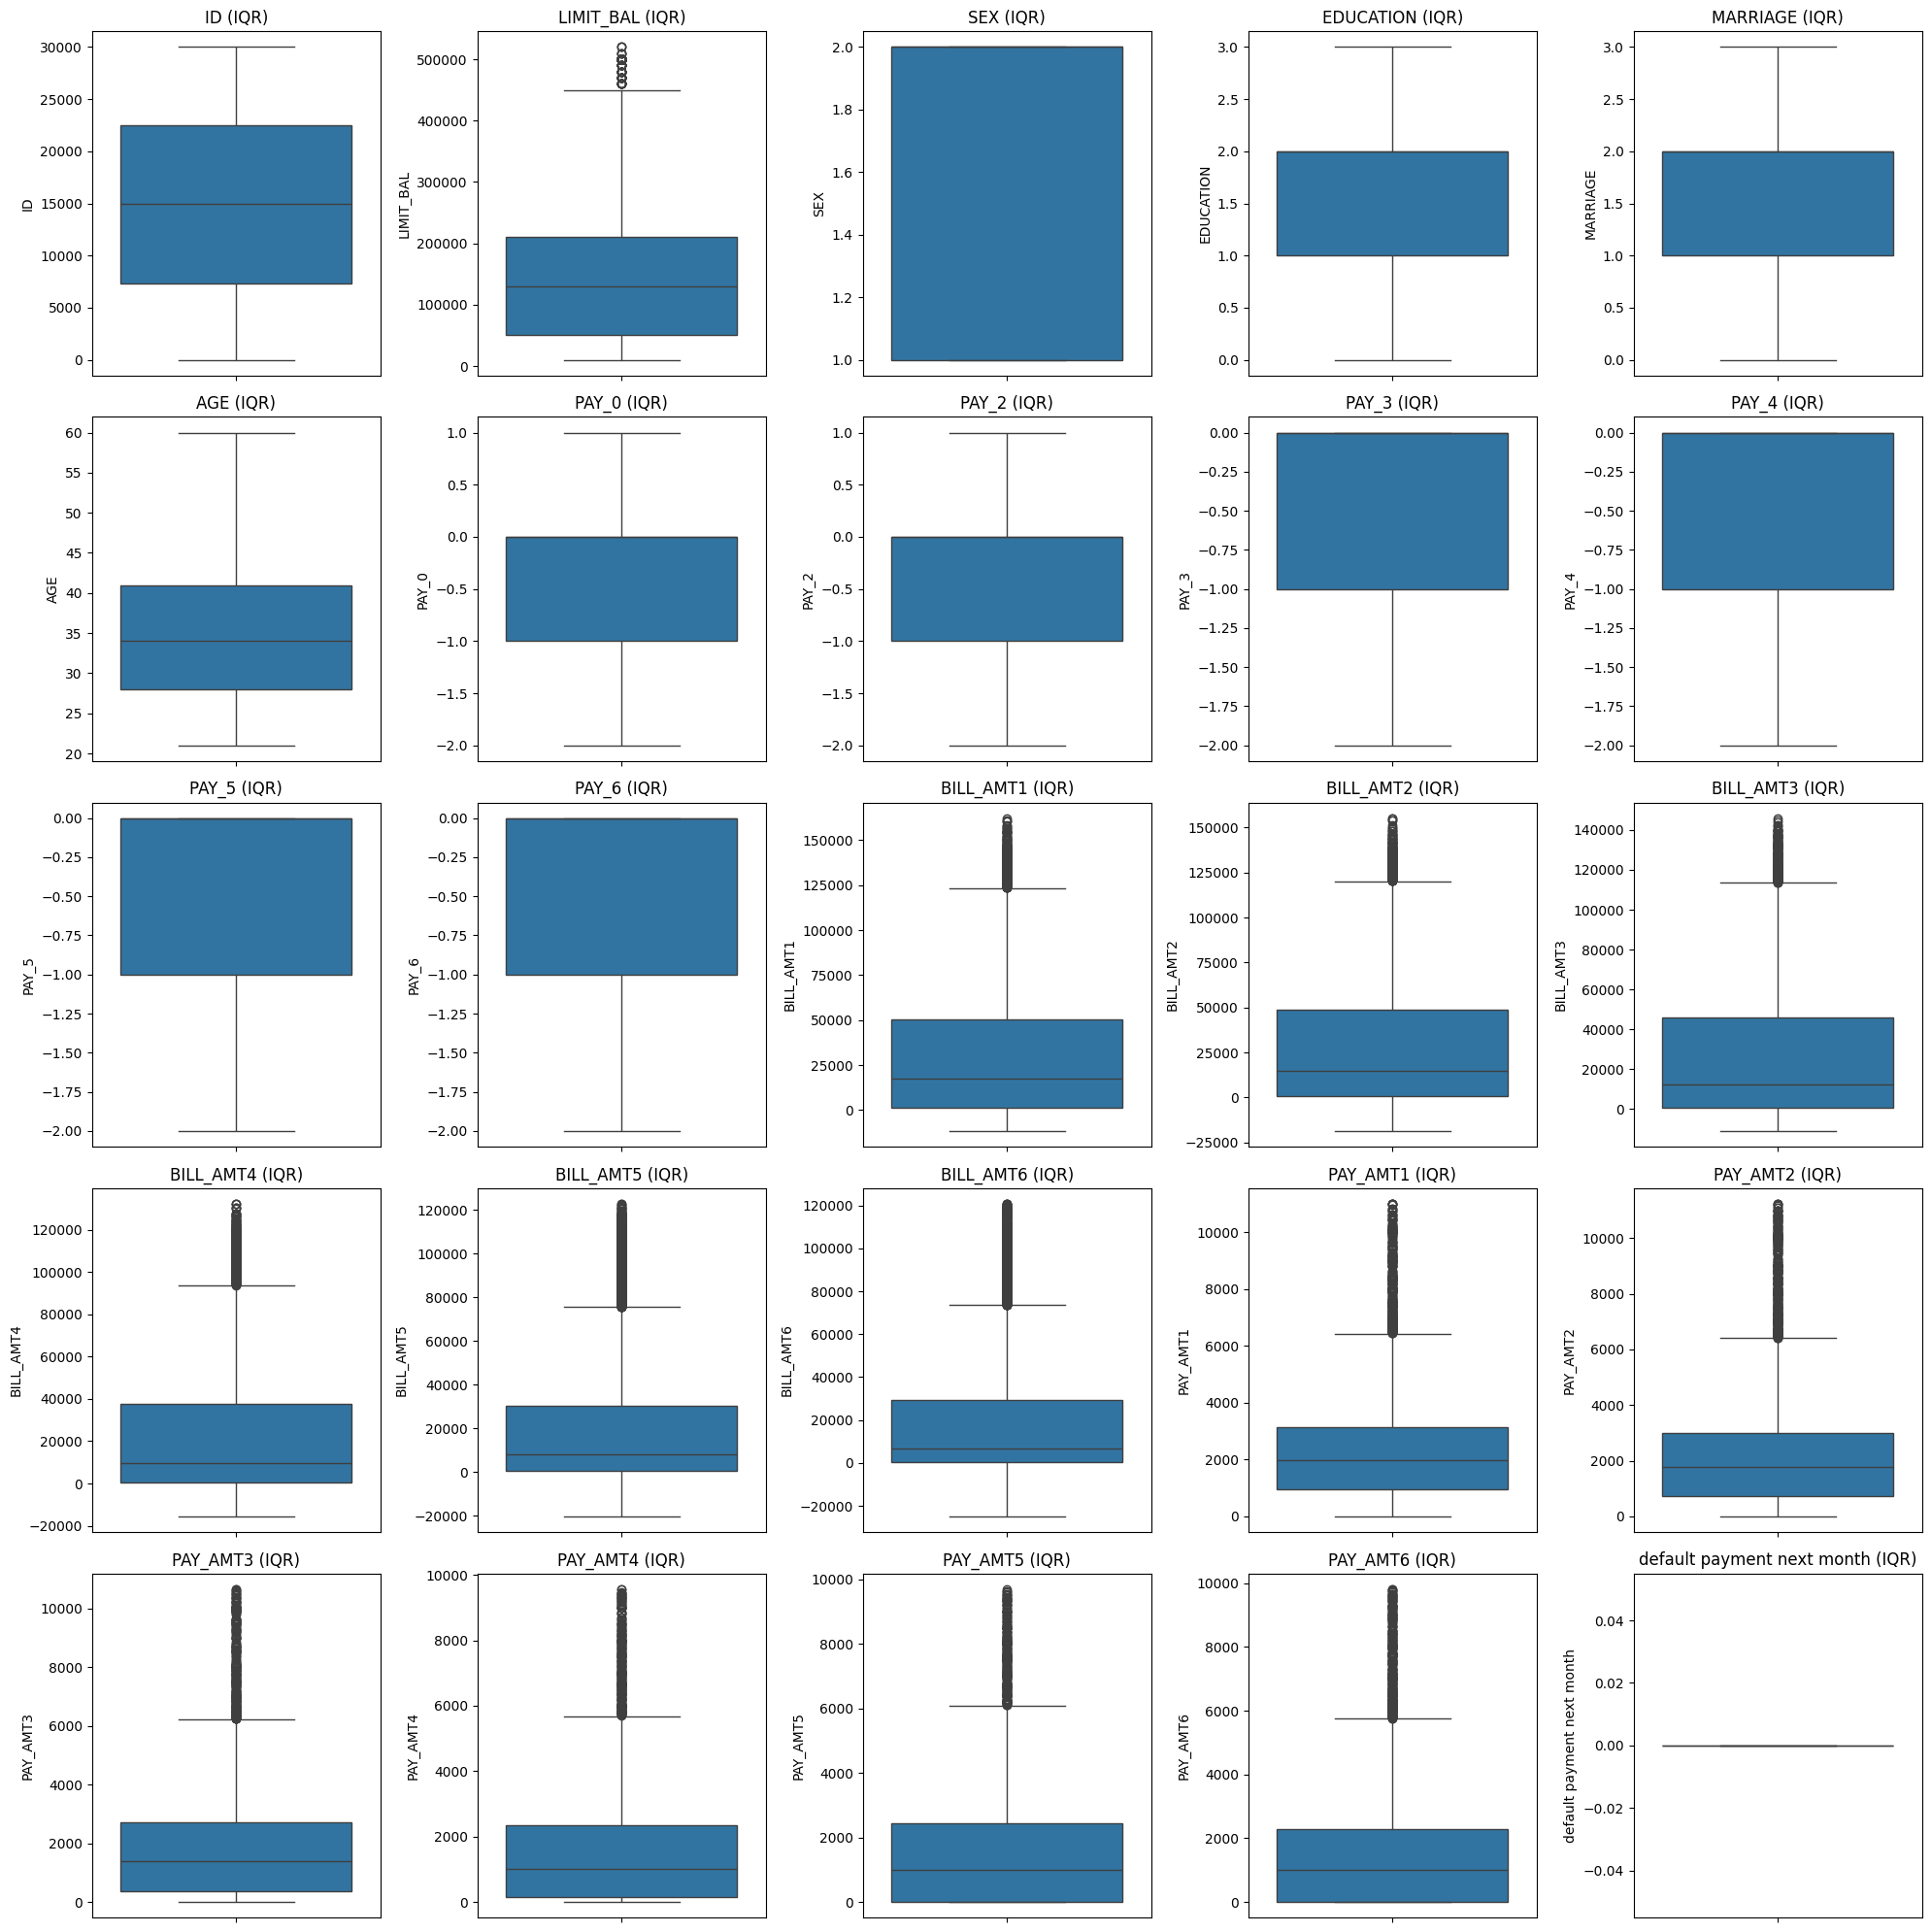

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sbn

plt.figure(figsize=(20, 20))
for i, col in enumerate(numeric_vars):
    plt.subplot(5, 5, i + 1)
    sbn.boxplot(y=df_no_outliers_iqr[col])  # horizontal
    plt.title(f"{col} (IQR)")
plt.tight_layout()
plt.show()

**Detección de datos perdidos**

In [ ]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Valores perdidos': missing, 'Porcentaje': missing_percent})
print(missing_df)

                            Valores perdidos  Porcentaje
ID                                         0         0.0
LIMIT_BAL                                  0         0.0
SEX                                        0         0.0
EDUCATION                                  0         0.0
MARRIAGE                                   0         0.0
AGE                                        0         0.0
PAY_0                                      0         0.0
PAY_2                                      0         0.0
PAY_3                                      0         0.0
PAY_4                                      0         0.0
PAY_5                                      0         0.0
PAY_6                                      0         0.0
BILL_AMT1                                  0         0.0
BILL_AMT2                                  0         0.0
BILL_AMT3                                  0         0.0
BILL_AMT4                                  0         0.0
BILL_AMT5                      

**Imputación de valores faltantes con la mediana**

In [ ]:
df_imputed = df.copy()
for col in numeric_vars:
    df_imputed[col].fillna(df_imputed[col].median(), inplace=True)

/tmp/ipython-input-17-3441159290.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed[col].fillna(df_imputed[col].median(), inplace=True)


**Normalización: Min-Max Scaling**

In [ ]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_imputed[numeric_vars]), columns=numeric_vars)
df_minmax = pd.concat([df_imputed.drop(numeric_vars, axis=1), df_minmax], axis=1)
df_minmax

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0.000000,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,...,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.000033,0.111111,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,...,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783,1.0
2,0.000067,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,...,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458,0.0
3,0.000100,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,...,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892,0.0
4,0.000133,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,...,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.999867,0.212121,0.0,0.500000,0.333333,0.310345,0.2,0.2,0.2,0.2,...,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892,0.0
29996,0.999900,0.141414,0.0,0.500000,0.666667,0.379310,0.1,0.1,0.1,0.1,...,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000,0.0
29997,0.999933,0.020202,0.0,0.333333,0.666667,0.275862,0.6,0.5,0.4,0.1,...,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864,1.0
29998,0.999967,0.070707,0.0,0.500000,0.333333,0.344828,0.3,0.1,0.2,0.2,...,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412,1.0


**Estandarización: Z-score**

In [ ]:
scaler_std = StandardScaler()
df_zscore = pd.DataFrame(scaler_std.fit_transform(df_imputed[numeric_vars]), columns=numeric_vars)
df_zscore

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,-1.731993,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1.876378
1,-1.731878,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1.876378
2,-1.731762,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.532942
3,-1.731647,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.532942
4,-1.731531,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.532942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.731531,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.014861,0.111736,0.138865,0.188746,...,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130,-0.532942
29996,1.731647,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,...,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382,-0.532942
29997,1.731762,-1.059646,-1.234323,0.185828,0.858557,0.164303,3.574267,2.617654,1.809921,-0.666599,...,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001,1.876378
29998,1.731878,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.904712,-0.723570,0.138865,0.188746,...,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904,1.876378


# **Division de datos**

**Considerar estos detalles:**

  -Tamaño del dataset: Muy pequeño (< 500 muestras) División recomendada: 90% train / 10% test o usar validación cruzada (cross-validation) Detalles: No conviene perder muchos datos para prueba; mejor usar técnicas como k-fold CV.

  -Tamaño del dataset: Pequeño - Medio (500 – 2000 muestras) División recomendada: 80% train / 20% test Detalles: Buen balance entre entrenamiento y evaluación; común en muchos proyectos.
    
  -Tamaño del dataset: Grande (2000 – 50,000 muestras) División recomendada: 70% train / 30% test Detalles: Proporción estándar en machine learning. Suficiente información para evaluar rendimiento.
  
  -Tamaño del dataset: Muy grande (> 50,000 muestras) División recomendada: 60% train / 40% test o incluso 50% / 50% Detalles: Cuando el dataset es enorme, se puede reservar más datos para prueba sin perjudicar el entrenamiento.
  
  -Para modelos finales / tuning fino División recomendada: 60% train / 20% val / 20% test Detalles: Se separa un conjunto de validación para ajustar hiperparámetros y otro test para la evaluación final.

**Fuentes bibliográficas:**

- Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow de Aurélien Géron.

- Deep Learning Specialization de Andrew Ng.

- Scikit-learn documentation.

- Kaggle Notebooks / Competitions.

- Blogs y best practices en empresas (Google, Microsoft, Towards Data Science).



In [ ]:
# Usá df_minmax o df_zscore según el procesamiento elegido:
X = df_minmax.drop(columns=["BILL_AMT1", "ID", "default payment next month"])
y = df_minmax["BILL_AMT1"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2025)

In [ ]:
print("Tamaño del dataset:", len(df_minmax))
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Tamaño y_train:", y_train.shape)
print("Tamaño y_test:", y_test.shape)

Tamaño del dataset: 30000
Tamaño X_train: (21000, 22)
Tamaño X_test: (9000, 22)
Tamaño y_train: (21000,)
Tamaño y_test: (9000,)


**Alternartivo: Modelo final con tuning de hiperparámetros.**


Separar los datos mediante:

  - Entrenamiento (60%)
  - Validación (20%) → tuning de hiperparámetros.
  - Prueba (20%) → evaluación final



In [ ]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=2025)

# **Modelo Machine Learning de predicción: Regresion**

In [ ]:
# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicciones
y_pred = modelo.predict(X_test)
y_pred

array([0.14911765, 0.18466693, 0.15172128, ..., 0.16673364, 0.15332879,
       0.16662126])

**Metricas de la Regresión**

- MSE(Mean Squared Error): Promedio del cuadrado del error.
- RMSE (Raíz del MSE): Error típico esperado.
- MAE (Mean Absolute Error): Promedio del valor absoluto del error.
- R^2(coeficiente de determinación):Qué tanto explica el modelo la variabilidad de los datos.



In [ ]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

**Resultados:**

In [ ]:
print("Predicciones:", y_pred[:10])


Predicciones: [0.14911765 0.18466693 0.15172128 0.16102159 0.15097255 0.15282459
 0.19158715 0.21399728 0.17877903 0.15421744]


In [ ]:
print("Coeficientes:", modelo.coef_)

Coeficientes: [ 0.01010368 -0.00033645  0.00301687  0.00089026 -0.00030341  0.00211393
  0.01708278 -0.01513309 -0.00098225 -0.00438378 -0.00126067  0.9504712
  0.02662981 -0.01000361 -0.00818543 -0.02109244 -0.59057455  0.19884261
  0.12683068  0.07493774  0.05683012  0.02880422]


In [ ]:
print(" MAE:", mean_absolute_error(y_test, y_pred))
print(" MSE:", mean_squared_error(y_test, y_pred))
print(" RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(" R²:", r2_score(y_test, y_pred))

 MAE: 0.00722286883155404
 MSE: 0.0003529968890821301
 RMSE: 0.018788211439147957
 R²: 0.9172951049609116


In [ ]:
print("--- Evaluación del Modelo de Regresión Lineal ---")
print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.2f}")
print(f"R^2 (Coeficiente de Determinación): {r2:.4f}")

--- Evaluación del Modelo de Regresión Lineal ---
MAE (Error Absoluto Medio): 0.01
RMSE (Raíz del Error Cuadrático Medio): 0.02
R^2 (Coeficiente de Determinación): 0.9173


**Gráfico**

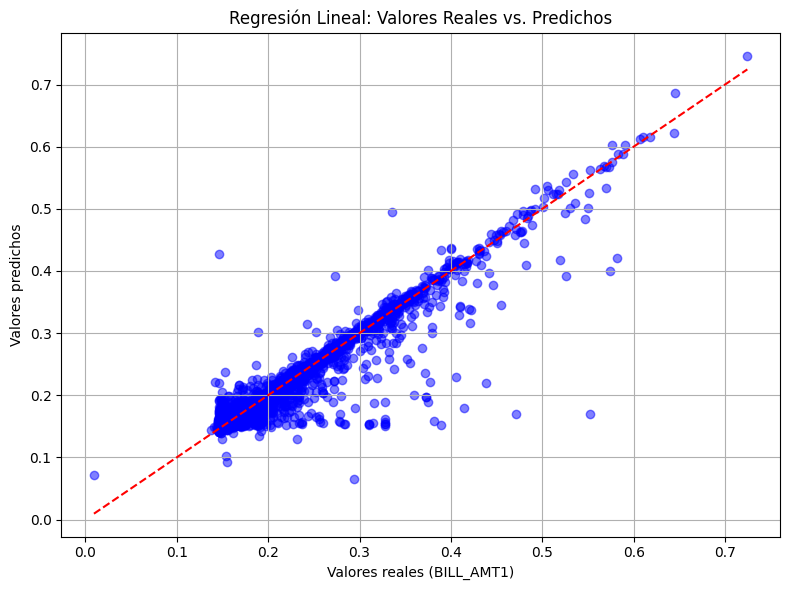

In [ ]:
# Gráfico: valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Valores reales (BILL_AMT1)")
plt.ylabel("Valores predichos")
plt.title("Regresión Lineal: Valores Reales vs. Predichos")
plt.grid(True)
plt.tight_layout()
plt.show()


# Modelo Machine Learning de predicción: Regresion con validación y búsqueda de hiperparámetros **texto en negrita**


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# Separación 60% train / 20% val / 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

In [ ]:
# Definir modelo y grid de hiperparámetros
ridge = Ridge()
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [ ]:
# Grid search usando validación cruzada dentro del set de entrenamiento
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Mejor modelo
best_model = grid.best_estimator_
print("Mejor alpha encontrado:", grid.best_params_["alpha"])

Mejor alpha encontrado: 0.1


In [ ]:
# Evaluación en set de validación
y_val_pred = best_model.predict(X_val)
print("\n--- Validación ---")
print("MAE:", mean_absolute_error(y_val, y_val_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_val, y_val_pred)))  # Calculate RMSE by taking the square root
print("R²:", r2_score(y_val, y_val_pred))


--- Validación ---
MAE: 0.006877855067917631
RMSE: 0.017155035191697778
R²: 0.9261528701052534


In [ ]:
# Evaluación en set de prueba (final)
y_test_pred = best_model.predict(X_test)
print("\n--- Prueba (Test Final) ---")
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("R²:", r2_score(y_test, y_test_pred))


--- Prueba (Test Final) ---
MAE: 0.0071613255700497015
RMSE: 0.017668534680958917
R²: 0.9282777532542784


**Gráfico:**

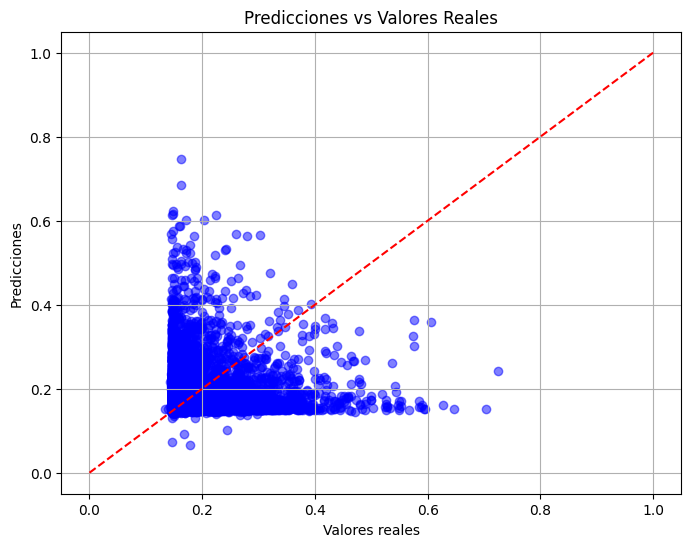

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([0, 1], [0, 1], 'r--')  # línea ideal: predicción = real
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs Valores Reales")
plt.grid(True)
plt.show()

**Distribución de Errores**

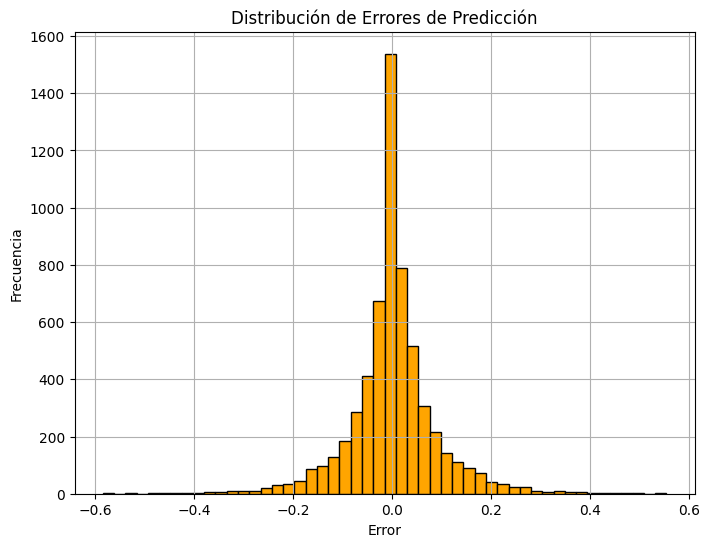

In [ ]:
errores = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(errores, bins=50, color='orange', edgecolor='black')
plt.title("Distribución de Errores de Predicción")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# **Modelo Estadístico Clásico de Regresión**

In [ ]:
import statsmodels.api as sm

In [ ]:
# Agregar constante (intercepto) manualmente
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [ ]:
# Ajustar modelo OLS (Ordinary Least Squares)
modelo_ols = sm.OLS(y_train, X_train_sm).fit()
modelo_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              BILL_AMT1   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.072e+04
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:21:53   Log-Likelihood:                 47341.
No. Observations:               18000   AIC:                        -9.464e+04
Df Residuals:                   17977   BIC:                        -9.446e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0864      0.002     34.932      0.000       0.082       0.091
LIMIT_BAL      0.0124      0.001     10.075      0.000       0.010       0.015
SEX           -0.0006      0.000     -2.400      0.016      -0.001      -0.000
EDUCATION      0.0047      0.001      4.460      0.000       0.003       0.007
MARRIAGE       0.0012      0.001      1.456      0.146      -0.000       0.003
AGE           -0.0007      0.001     -0.793      0.428      -0.003       0.001
PAY_0          0.0026      0.002      1.624      0.104      -0.001       0.006
PAY_2          0.0174      0.002      8.989      0.000       0.014       0.021
PAY_3         -0.0171      0.002     -8.220      0.000      -0.021      -0.013
PAY_4         -0.0019      0.002     -0.831      0.406      -0.006       0.003
PAY_5         -0.0002      0.002     -0.061      0.951      -0.005       0.005
PAY_6         -0.0020      0.002     -0.983      0.326      -0.006       0.002
BILL_AMT2      0.9522      0.007    143.392      0.000       0.939       0.965
BILL_AMT3     -0.0026      0.015     -0.167      0.868      -0.033       0.028
BILL_AMT4      0.0309      0.010      3.140      0.002       0.012       0.050
BILL_AMT5     -0.0351      0.011     -3.266      0.001      -0.056      -0.014
BILL_AMT6     -0.0204      0.011     -1.897      0.058      -0.041       0.001
PAY_AMT1      -0.5117      0.008    -67.521      0.000      -0.527      -0.497
PAY_AMT2       0.1048      0.013      7.949      0.000       0.079       0.131
PAY_AMT3       0.0696      0.008      8.202      0.000       0.053       0.086
PAY_AMT4       0.0941      0.006     15.173      0.000       0.082       0.106
PAY_AMT5       0.0272      0.005      6.032      0.000       0.018       0.036
PAY_AMT6       0.0326      0.004      7.759      0.000       0.024       0.041
==============================================================================
Omnibus:                    22319.528   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7765747.530
Skew:                           6.432   Prob(JB):                         0.00
Kurtosis:                     103.940   Cond. No.                         233.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Correlación de variables numéricas:**

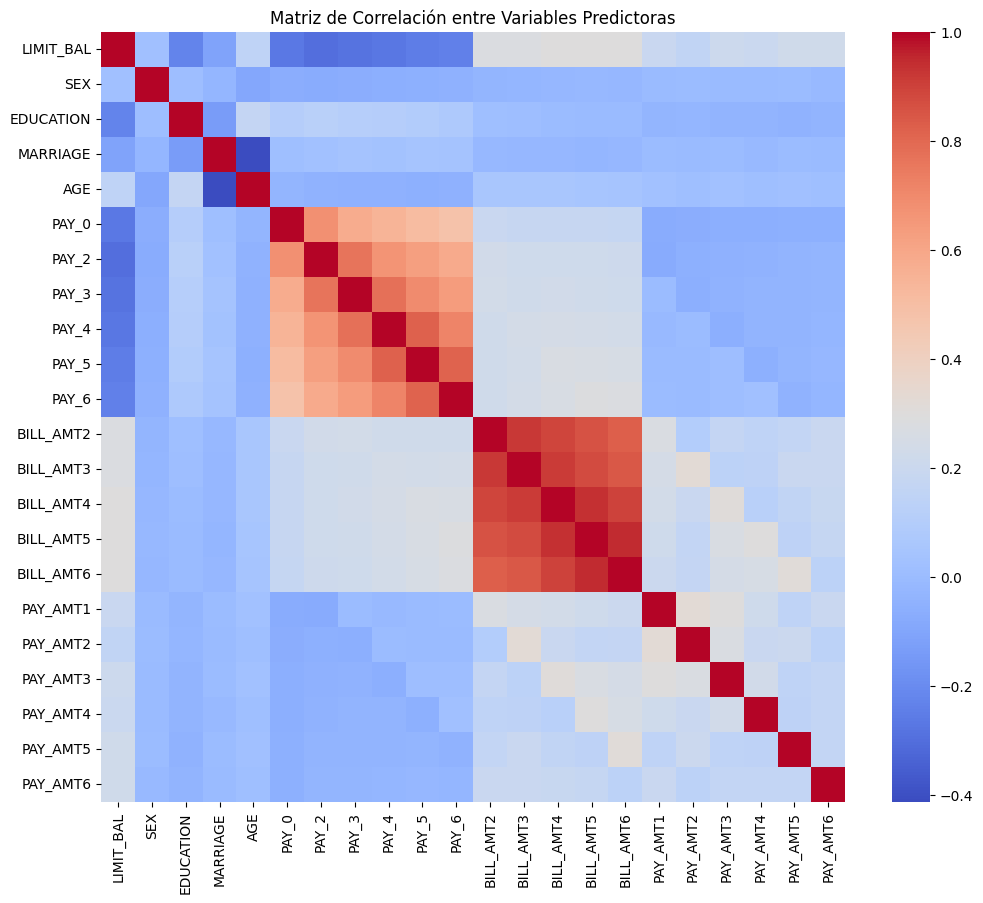

In [ ]:
correlation_matrix = X_train.corr()
plt.figure(figsize=(12, 10))
sbn.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Predictoras")
plt.show()

**Matriz de correlación de las variables finales**

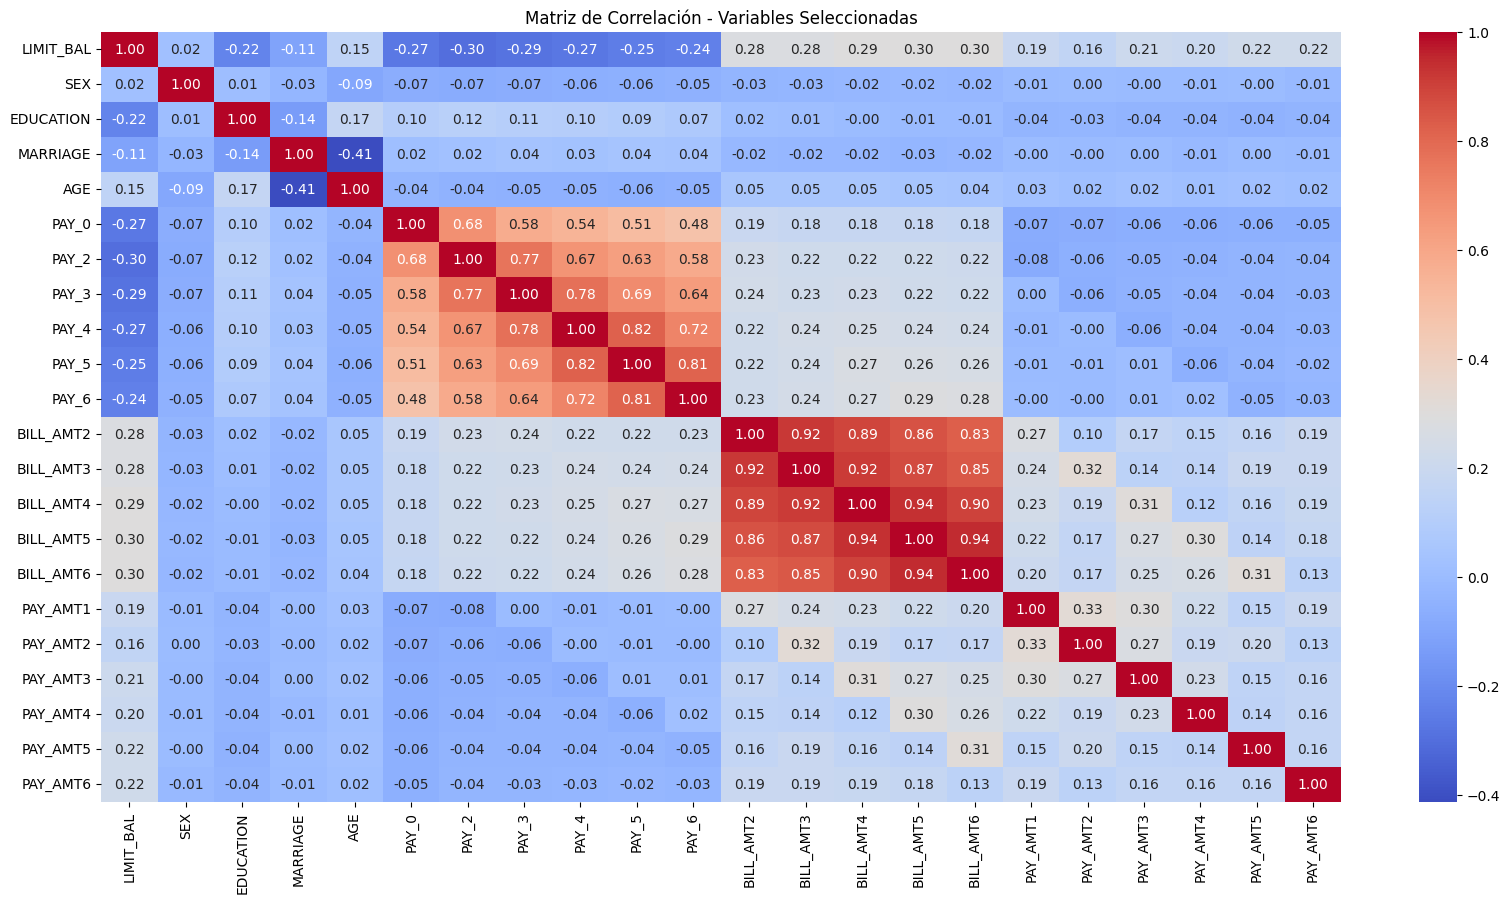

In [ ]:
plt.figure(figsize=(20, 10))
sbn.heatmap(X_train_sm.drop(columns='const').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Variables Seleccionadas")
plt.show()

**Selección de variables**

In [ ]:
import statsmodels.api as sm

In [ ]:
X_opt = sm.add_constant(X_train.copy())
modelo = sm.OLS(y_train, X_opt).fit()

In [ ]:
# Iterativa: elimina variables con p > 0.05
while max(modelo.pvalues) > 0.05:
    worst_pval_var = modelo.pvalues.idxmax()
    print(f"Eliminando '{worst_pval_var}' con p-valor = {modelo.pvalues[worst_pval_var]:.4f}")
    X_opt = X_opt.drop(columns=worst_pval_var)
    modelo = sm.OLS(y_train, X_opt).fit()

# Resultado final
print("\n--- Modelo final tras selección ---")
print(modelo.summary())

Eliminando 'PAY_5' con p-valor = 0.9512
Eliminando 'BILL_AMT3' con p-valor = 0.8683
Eliminando 'AGE' con p-valor = 0.4280
Eliminando 'PAY_4' con p-valor = 0.3297
Eliminando 'PAY_0' con p-valor = 0.1200
Eliminando 'PAY_6' con p-valor = 0.1031
Eliminando 'MARRIAGE' con p-valor = 0.0617

--- Modelo final tras selección ---
                            OLS Regression Results                            
Dep. Variable:              BILL_AMT1   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.573e+04
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:24:04   Log-Likelihood:                 47336.
No. Observations:               18000   AIC:                        -9.464e+04
Df Residuals:                   17984   BIC:                        -9.451e+04
Df Model:                          15         

**VIF**

Considerar:

   -  VIF > 5 → posible colinealidad moderada.

   -  VIF > 10 → colinealidad severa, considerar eliminar.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

In [ ]:
# Calcular VIF solo para variables numéricas finales
vif_data = pd.DataFrame()
vif_data["Variable"] = X_opt.columns
vif_data["VIF"] = [variance_inflation_factor(X_opt.values, i) for i in range(X_opt.shape[1])]
print("\n--- VIF (Multicolinealidad) ---")
print(vif_data)


--- VIF (Multicolinealidad) ---
     Variable         VIF
0       const  330.838699
1   LIMIT_BAL    1.474082
2         SEX    1.007121
3   EDUCATION    1.062764
4       PAY_2    2.585007
5       PAY_3    2.546360
6   BILL_AMT2    6.031519
7   BILL_AMT4   17.210318
8   BILL_AMT5   25.168125
9   BILL_AMT6   14.518973
10   PAY_AMT1    1.347421
11   PAY_AMT2    1.265380
12   PAY_AMT3    1.412560
13   PAY_AMT4    1.738691
14   PAY_AMT5    1.675559
15   PAY_AMT6    1.157711


# Consideraciones Extras

# **Regularización (Ridge y Lasso)**

**Para evitar sobreajuste o cuando hay muchas variables correlacionadas.**

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Ridge Regression (L2)
modelo_ridge = Ridge(alpha=1.0).fit(X_train, y_train); modelo_ridge.score(X_test, y_test)

0.927044875037085

In [ ]:
# Lasso Regression (L1)
modelo_lasso = Lasso(alpha=1.0).fit(X_train, y_train); modelo_lasso.score(X_test, y_test)

-0.00030956403466819715

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Modelo Ridge:
y_pred_ridge = modelo_ridge.predict(X_test)
print("Ridge - R²:", r2_score(y_test, y_pred_ridge))
print("Ridge - MSE:", mean_squared_error(y_test, y_pred_ridge))

Ridge - R²: 0.927044875037085
Ridge - MSE: 0.0003175433240174616


In [ ]:
# Modelo Lasso:
y_pred_lasso = modelo_lasso.predict(X_test)
print("Lasso - R²:", r2_score(y_test, y_pred_lasso))
print("Lasso - MSE:", mean_squared_error(y_test, y_pred_lasso))

Lasso - R²: -0.00030956403466819715
Lasso - MSE: 0.0043539316007133394


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

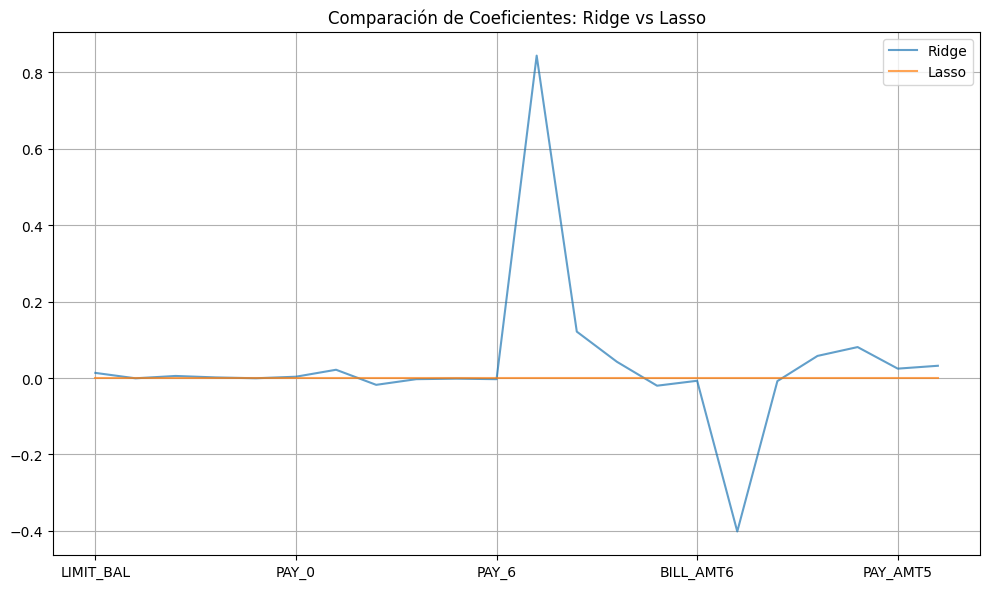

In [ ]:
coef_ridge = pd.Series(modelo_ridge.coef_, index=df.drop(["ID", "default payment next month", "BILL_AMT1"], axis=1).columns)
coef_lasso = pd.Series(modelo_lasso.coef_, index=df.drop(["ID", "default payment next month", "BILL_AMT1"], axis=1).columns)

plt.figure(figsize=(10, 6))
coef_ridge.plot(label="Ridge", alpha=0.7)
coef_lasso.plot(label="Lasso", alpha=0.7)
plt.legend()
plt.title("Comparación de Coeficientes: Ridge vs Lasso")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Cross-Validation**

**Para estimar el rendimiento del modelo con mayor robustez:**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("R² promedio (CV):", scores.mean())

R² promedio (CV): 0.9276842702376229


# **Análisis de residuos**

Ver cómo se comportan los errores del modelo:

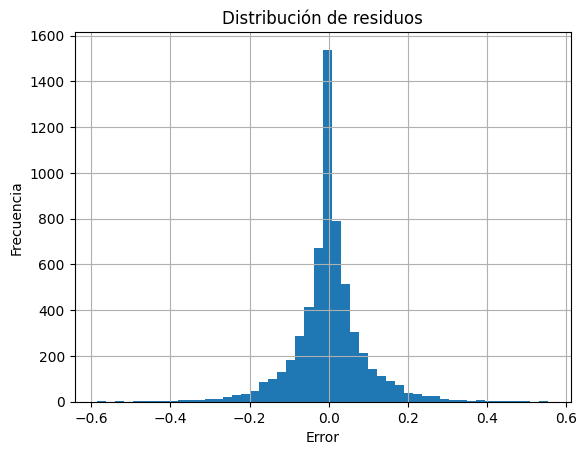

In [ ]:
residuos = y_test - y_pred
plt.hist(residuos, bins=50)
plt.title("Distribución de residuos")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

In [ ]:
import scipy.stats as stats
import seaborn as sns

**Normalidad**

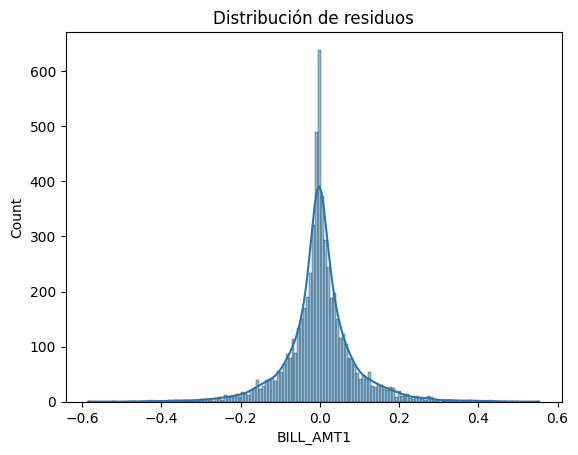

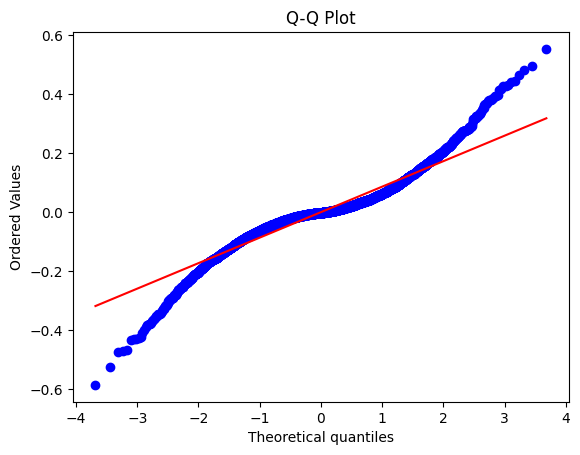

Shapiro-Wilk p-value: 1.198771088903701e-49


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Histograma y Q-Q plot
sns.histplot(residuos, kde=True)
plt.title("Distribución de residuos")
plt.show()

# Q-Q plot
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

# Test de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print("Shapiro-Wilk p-value:", shapiro_test.pvalue)

**Homocedasticidad**

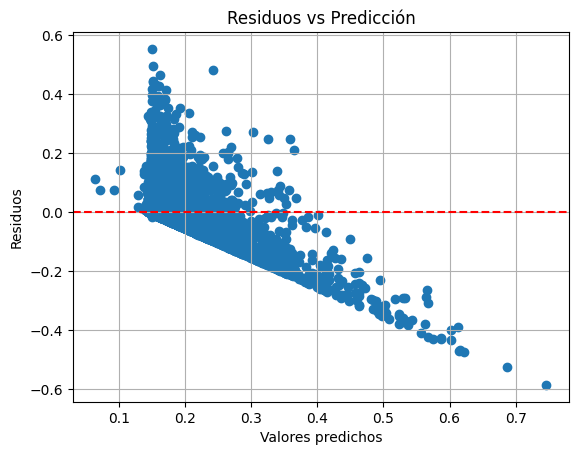

In [ ]:
plt.scatter(y_pred, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores predichos")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicción")
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [ ]:
X_const = sm.add_constant(X_train)
modelo_ols = sm.OLS(y_train, X_const).fit()
bp_test = sms.het_breuschpagan(modelo_ols.resid, X_const)

print("Breusch-Pagan p-value:", bp_test[1])

Breusch-Pagan p-value: 2.359134149746979e-243


**Independencia de errores - Autocorrelación**

**El valor de Durbin-Watson oscila entre 0 y 4:**

- a) Aprox a 2 → errores no autocorrelacionados (ideal)

- b) < 2 : autocorrelación positiva

- c) > 2 : autocorrelación negativa

El test Durbin-Watson está diseñado para interpretación numérica y comparativa

In [ ]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
dw = durbin_watson(residuos)
print("Durbin-Watson:", dw)

Durbin-Watson: 2.0020479671683638


# **Importancia de variables**

**Interpretar cuáles variables influyen más**

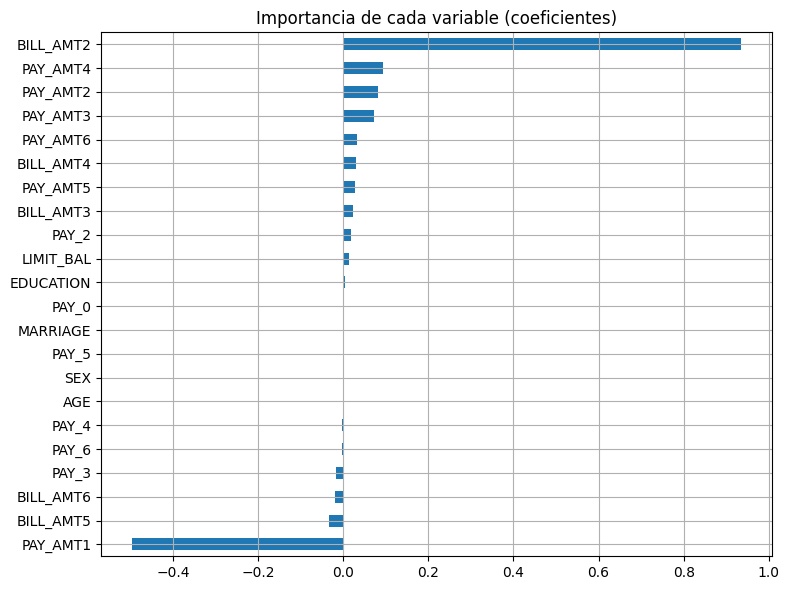

In [ ]:
coef = pd.Series(best_model.coef_, index=X.columns)
coef.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Importancia de cada variable (coeficientes)")
plt.grid(True)
plt.tight_layout()
plt.show()